In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import json

In [2]:
# Đọc dữ liệu từ file ‘fpt_product.csv’ loại bỏ các giá trị NaN, các khối có “Năm ra mắt” có giá trị “Đang cập nhật”
df = pd.read_csv('fpt_product.csv').dropna().drop(columns=['name', 'url'])
df = df[df['Năm ra mắt'] != 'Đang cập nhật']

In [3]:
print(list(df.columns))

['price', 'Tốc độ CPU', 'CPU', 'Tốc độ BUS', 'Loại CPU', 'Tốc độ tối đa', 'Hãng CPU', 'Bộ nhớ đệm', 'Tên đầy đủ (CPU)', 'Số luồng', 'Số lõi', 'RAM', 'Loại RAM', 'Số khe cắm rời', 'Tốc độ RAM', 'Dung lượng nâng cấp tối đa', 'Số RAM onboard', 'Tên đầy đủ (RAM)', 'Số khe RAM còn lại', 'Màn hình cảm ứng', 'Công nghệ màn hình', 'Màn hình', 'Độ phân giải', 'Tần số quét', 'Loại cảm ứng', 'Tấm nền', 'Tên đầy đủ (Màn hình)', 'Độ tương phản', 'Độ sáng', 'Tỷ lệ màn hình', 'Độ phủ màu', 'Kiểu màn hình', 'Card đồ họa', 'Card rời', 'Có Card rời', 'Có Card onbroad', 'Hãng (Card onbroad)', 'Model (Card onbroad)', 'Model (Card rời)', 'Xung nhịp tối đa (Card onbroad)', 'Xung nhịp (Card onbroad)', 'Đồ họa', 'Xung nhịp (Card rời)', 'Xung nhịp tối đa (Card rời)', 'Card onbroad', 'Bộ nhớ đồ họa (Card rời)', 'Kiểu bộ nhớ', 'Hãng (Card rời)', 'Tên đầy đủ (Card rời)', 'Tổng số khe cắm SSD/HDD', 'Tốc độ đọc/ghi', 'Tốc độ quay HDD', 'Có SSD', 'Số khe SSD/HDD còn lại', 'Dung Lượng HDD', 'Ổ cứng', 'Dung lượng SSD'

In [4]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

In [5]:
df['Card đồ họa'] = lb.fit_transform(df['Card đồ họa'])

In [6]:
for i in range(0, len(lb.classes_)):
  print(i, lb.inverse_transform(np.array([i])))

0 ['AMD Graphics']
1 ['AMD Graphics Vega 3']
2 ['AMD Radeon Graphics']
3 ['AMD Radeon Graphics Vega 6']
4 ['AMD Radeon Graphics Vega 8']
5 ['AMD Radeon R5300M-3GB DDR6']
6 ['Apple M1']
7 ['Card Onboard']
8 ['GTX 1650 Ti 4GB']
9 ['GeForce GTX 1650 4GB']
10 ['GeForce GTX 1650 MaxQ 4GB']
11 ['GeForce GTX 1650 Ti 4GB']
12 ['GeForce GTX 1660 Ti 6GB']
13 ['GeForce MX110 2GB']
14 ['GeForce MX130 2GB']
15 ['GeForce MX230 2GB']
16 ['GeForce MX250 2GB']
17 ['GeForce MX330 2GB']
18 ['GeForce MX350 2GB']
19 ['GeForce RTX 2060 6GB']
20 ['GeForce RTX1660 Ti 6GB']
21 ['GeForceMX330 2GB']
22 ['GeForce\xa0GTX\xa01650-4GB']
23 ['Geforce GTX1650 4GB']
24 ['Gefore 1650Ti 4GB']
25 ['Intel HD Graphics 520']
26 ['Intel HD Graphics 6000']
27 ['Intel HD Graphics 620']
28 ['Intel Iris Plus Graphics']
29 ['Intel Iris Plus Graphics 645']
30 ['Intel Iris XE Graphics']
31 ['Intel Iris Xe Graphics']
32 ['Intel QHD Graphics 620']
33 ['Intel UHD Graphics']
34 ['Intel UHD Graphics 620']
35 ['Intel UHD Graphisc']
36 ['I

###  Tiền xử lý dữ liệu

In [7]:
# Process CPU
benmark = {'Intel Core i5-10300H':  8854, 'AMD Ryzen 7-3750H': 8416, 'AMD Ryzen 5-4600H': 14852, 'AMD Ryzen 5-3550H': 8128,'Intel Core i5-9300H': 7922,
'Intel Core i7-10750H': 12622,'Intel Core i7-9750H': 11349,'AMD Ryzen 7-4800H': 19130,'Intel Core i3-8145U': 3781,'Intel Core i3-1005G1': 5248,
'Intel Core i3-8130U': 3629,'Intel Core i5-10210U': 6534,'Intel Core i5-1035G1': 8006,'AMD Ryzen 5-3500U': 7169,'Intel Core i7-10510U': 6234,
'Intel Core i5-1035G4': 8390,'Intel Core i5-1135G7': 8365,'Intel Core i7-1165G7': 10504,'Intel Core i3-1115G4': 6436,'Intel Pentium N5030': 2121,
'AMD Ryzen 7-3700U': 7323,'Apple M1': 16761,'AMD Ryzen 3-4300U': 7954,'Intel Core i7-10870H': 16195,'AMD Ryzen 3-3250U': 4254,'AMD Ryzen 7-4700U': 20179,
'Intel Core i3-10110U': 4091,'AMD Ryzen 5-4500U': 11264,'Intel Core i5-8th-gen': 8000,'Intel Core i5-10th-gen': 10000,'Intel Core i5-8265U': 5988,
'AMD Ryzen 3-3200U': 2100, 'Intel Pentium N5000': 2121,'Intel Core i7-1065G7': 8981,'AMD Ryzen 5-2500U': 6491,'Intel Core i5-5th-gen': 5000, 'AMD Ryzen 7-4700H' :13801}
df['Tên đầy đủ (CPU)'] = df['Tên đầy đủ (CPU)'].apply(lambda x: benmark[x])
df = df.drop(columns =['Tốc độ CPU', 'CPU', 'Tốc độ BUS', 'Loại CPU', 'Tốc độ tối đa', 'Hãng CPU', 'Bộ nhớ đệm', 'Loại RAM'])

In [8]:
# Process RAM
df['RAM'] = df['RAM'].astype(str).str[0].astype(int)

In [9]:
df['Tốc độ RAM'] = df['Tốc độ RAM'].apply(lambda x: int(x[:4]) if x != 'Đang cập nhật' else x)
df.loc[df['Tốc độ RAM'] == 'Đang cập nhật','Tốc độ RAM'] = df[df['Tốc độ RAM'] != 'Đang cập nhật']['Tốc độ RAM'].sum() / len(df[df['Tốc độ RAM'] != 'Đang cập nhật'])
df['Tốc độ RAM'] = df['Tốc độ RAM'].astype(int)

In [10]:
df = df[df['Dung lượng nâng cấp tối đa'] != 'Đang cập nhật']
df.loc[df['Dung lượng nâng cấp tối đa'] == 'Không', 'Dung lượng nâng cấp tối đa'] = 0
df['Dung lượng nâng cấp tối đa'] = df['Dung lượng nâng cấp tối đa'].apply(lambda x: int(x[:2]) if x != 0 else 0)

In [11]:
df['Màn hình'] = df['Màn hình'].astype(str).str[:-1].astype(float)

In [12]:
df['Độ phân giải'] = df['Độ phân giải'].apply(lambda x: int(x.split(' ')[0]) * int(x.split(' ')[2]))
df['Độ phân giải'] = df['Độ phân giải'] / max(df['Độ phân giải']) 
# Get thời gian bảo hành
df['Thời gian bảo hành'] = df['Thời gian bảo hành'].astype(str).str[:2].astype(int)

# Get have SSD?
df['Có SSD'] = df['Có SSD'].apply(lambda x: 1 if x == 'Có' else 0)
df['Có HDD'] = df['Có HDD'].apply(lambda x: 1 if x == 'Có' else 0)

# Get Card rời?
df['Có Card rời'] = df['Có Card rời'].apply(lambda x: 1 if x == 'Có' else 0)

# Get Card on Board?
df['Có Card onbroad'] = df['Có Card onbroad'].apply(lambda x: 1 if x == 'Có' else 0)

df['Số RAM onboard'] = df['Số RAM onboard'].apply(lambda x: 0 if x == 'Đang cập nhật' else x).astype(int)

In [13]:
df = df.drop(columns =['Tên đầy đủ (RAM)', 'Màn hình cảm ứng', 'Công nghệ màn hình', 'Loại cảm ứng', 'Tên đầy đủ (Màn hình)', 'Tấm nền', 'Độ tương phản','Tỷ lệ màn hình','Độ phủ màu','Kiểu màn hình', 'Card rời','Hãng (Card onbroad)','Model (Card onbroad)','Model (Card rời)','Xung nhịp (Card onbroad)','Đồ họa','Xung nhịp (Card rời)','Xung nhịp tối đa (Card rời)','Card onbroad'])

In [14]:
df['Tần số quét'] = df['Tần số quét'].apply(lambda x: int(x[:-3]) if x != 'Đang cập nhật' else x)
df.loc[df['Tần số quét'] == 'Đang cập nhật','Tần số quét'] = df[df['Tần số quét'] != 'Đang cập nhật']['Tần số quét'].sum() / len(df[df['Tần số quét'] != 'Đang cập nhật'])
df['Tần số quét'] = df['Tần số quét'].astype(int)

In [15]:
df['Độ sáng'] = df['Độ sáng'].apply(lambda x: int(x[:3]) if x != 'Đang cập nhật' else x)
df.loc[df['Độ sáng'] == 'Đang cập nhật','Độ sáng'] = df[df['Độ sáng'] != 'Đang cập nhật']['Độ sáng'].sum() / len(df[df['Độ sáng'] != 'Đang cập nhật'])
df['Độ sáng'] = df['Độ sáng'].astype(int)

In [16]:
df['Xung nhịp tối đa (Card onbroad)'] = df['Xung nhịp tối đa (Card onbroad)'].apply(lambda x: int(x[:-3]) if x != 'Đang cập nhật' else x)
df.loc[df['Xung nhịp tối đa (Card onbroad)'] == 'Đang cập nhật','Xung nhịp tối đa (Card onbroad)'] = df[df['Xung nhịp tối đa (Card onbroad)'] != 'Đang cập nhật']['Xung nhịp tối đa (Card onbroad)'].sum() / len(df[df['Xung nhịp tối đa (Card onbroad)'] != 'Đang cập nhật'])
df['Xung nhịp tối đa (Card onbroad)'] = df['Xung nhịp tối đa (Card onbroad)'].astype(int)

In [17]:
df['Bộ nhớ đồ họa (Card rời)'] = df['Bộ nhớ đồ họa (Card rời)'].apply(lambda x: int(x[0]) if x != 'Không' else 0)

In [18]:
df = df.drop(columns = ['Kiểu bộ nhớ', 'Hãng (Card rời)', 'Tên đầy đủ (Card rời)','Tốc độ đọc/ghi','Tốc độ quay HDD','Dung Lượng HDD','Ổ cứng','Kiểu HDD','Chuẩn M2','Kiểu SSD','Hỗ trợ công nghệ Optane','Khe đọc thẻ nhớ','Bluetooth'])

In [19]:
df['Tổng số khe cắm SSD/HDD'] = df['Tổng số khe cắm SSD/HDD'].apply(lambda x: int(x) if x != 'Đang cập nhật' else x)
df.loc[df['Tổng số khe cắm SSD/HDD'] == 'Đang cập nhật','Tổng số khe cắm SSD/HDD'] = df[df['Tổng số khe cắm SSD/HDD'] != 'Đang cập nhật']['Tổng số khe cắm SSD/HDD'].sum() / len(df[df['Tổng số khe cắm SSD/HDD'] != 'Đang cập nhật'])
df['Tổng số khe cắm SSD/HDD']=df['Tổng số khe cắm SSD/HDD'].astype(int)

In [20]:
df[df['Số khe SSD/HDD còn lại'] == 'Đang cập nhật'] = 0
df['Số khe SSD/HDD còn lại']=df['Số khe SSD/HDD còn lại'].astype(int)

In [21]:
df[df['Số cổng Gigabit Ethernet'] == 'Đang cập nhật'] = 0
df['Số cổng Gigabit Ethernet']=df['Số cổng Gigabit Ethernet'].astype(int)

In [22]:
df['Số cổng HDMI'] = df['Số cổng HDMI'].astype(int) 

In [23]:
df[df['Số cổng VGA'] == 'Đang cập nhật'] = 0
df['Số cổng VGA']=df['Số cổng Gigabit Ethernet'].astype(int)

In [24]:
df[df['Số khe cắm rời'] == 'Đang cập nhật'] = 0
df['Số khe cắm rời']=df['Số khe cắm rời'].astype(int)

In [25]:
clean_data = df[['Tên đầy đủ (CPU)', 'RAM', 'Màn hình', 'Độ phân giải', 'Thời gian bảo hành', 'Có SSD', 'Có HDD', 'Có Card rời', 'Có Card onbroad', 'Số RAM onboard', 'Tần số quét','Độ sáng', 'Xung nhịp tối đa (Card onbroad)', 'Bộ nhớ đồ họa (Card rời)', 'Tổng số khe cắm SSD/HDD', 'Số khe SSD/HDD còn lại', 'Số cổng Gigabit Ethernet' ,'Số cổng VGA', 'Số cổng HDMI', 'Số khe cắm rời', 'Tốc độ RAM', 'Card đồ họa', 'price']]

In [26]:
clean_data.shape

(181, 23)

In [27]:
# Tính toán ma trận tương quan giữa các thuộc tính với thuộc tính giá của laptop
corr_matrix = clean_data.corr()

In [28]:
# Sắp xếp độ tương quan của các thuộc tính theo thứ tự từ cao xuống thấp để chọn ra các thuộc tính có độ tương quan cao nhất
corr_matrix['price'].sort_values(ascending=False)

price                              1.000000
Độ sáng                            0.882128
Độ phân giải                       0.818918
Tên đầy đủ (CPU)                   0.803566
Tốc độ RAM                         0.799916
Màn hình                           0.761673
Có Card onbroad                    0.747632
Xung nhịp tối đa (Card onbroad)    0.731800
Tần số quét                        0.702001
Thời gian bảo hành                 0.674245
Có SSD                             0.637292
Tổng số khe cắm SSD/HDD            0.590393
RAM                                0.557276
Số cổng HDMI                       0.542227
Bộ nhớ đồ họa (Card rời)           0.536073
Có Card rời                        0.513077
Card đồ họa                        0.451590
Số khe cắm rời                     0.419317
Số RAM onboard                     0.387705
Số khe SSD/HDD còn lại             0.306825
Số cổng Gigabit Ethernet           0.301882
Số cổng VGA                        0.301882
Có HDD                          

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb50c5c8d68>,
      dtype=object)

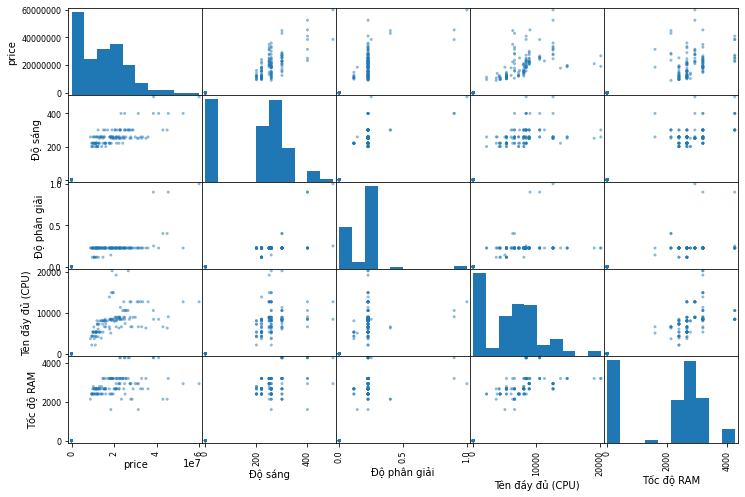

In [29]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas

# Đồ thị biểu diễn sự tương quan của 4 thuộc tính có độ tương quan với price cao nhất là Tốc độ RAM, Tên đầy đủ CPU, Độ sáng, Độ phân giải
from pandas.plotting import scatter_matrix

attributes = ["price", "Độ sáng", "Độ phân giải", "Tên đầy đủ (CPU)",
              "Tốc độ RAM"]
scatter_matrix(clean_data[attributes], figsize=(12, 8))

In [30]:
# Loại đi để xem Có HDD đó có độ tương quan với thuộc tính price quá thấp
clean_data.drop(columns=['Có HDD'], axis = 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
# Kiểm tra lại xem đã xóa cột đó chưa
len(clean_data.columns)

22

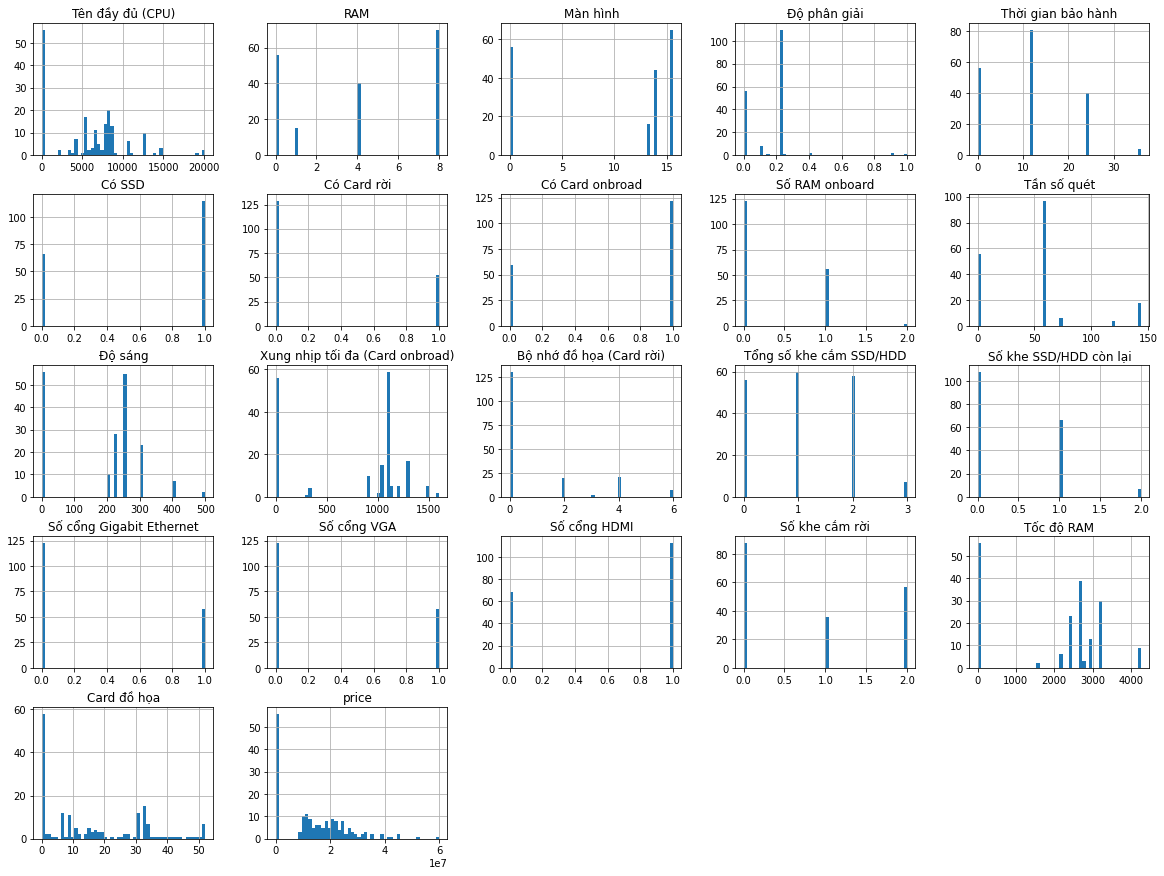

In [32]:
# Visualize phân bố dữ liệu của từng thuộc tính 
%matplotlib inline
import matplotlib.pyplot as plt
clean_data.hist(bins=50, figsize=(20,15))
plt.show()

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [34]:
y = clean_data['price'].values
x = clean_data.drop(columns=['price']).values

### Chia tập dữ liệu thành train và test 

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [36]:
# Normalize data with 0 mean, 1 std
stdScaler = StandardScaler()

stdScaler.fit(x_train)
stdScaler.transform(x_train)
stdScaler.transform(x_test)

array([[-1.20982949, -1.21654989, -1.49826172, -1.15317852, -1.24079748,
        -1.37113092, -0.66332496, -1.43660356, -0.67419986, -1.2009255 ,
        -1.40826085, -1.42631612, -0.58674772, -1.24756572, -0.79593207,
        -0.68511879, -0.68511879, -1.29099445, -0.96880431, -1.42746971,
        -1.00836835],
       [-1.20982949, -1.21654989, -1.49826172, -1.15317852, -1.24079748,
        -1.37113092, -0.66332496, -1.43660356, -0.67419986, -1.2009255 ,
        -1.40826085, -1.42631612, -0.58674772, -1.24756572, -0.79593207,
        -0.68511879, -0.68511879, -1.29099445, -0.96880431, -1.42746971,
        -1.00836835],
       [ 0.16899752,  1.08093449,  0.54745154,  0.45124664,  0.06339841,
         0.72932496,  1.50755672,  0.69608626,  1.4832397 ,  0.16200584,
         0.58168693,  1.35131994,  0.57067244, -0.12475657, -0.79593207,
         1.4596009 ,  1.4596009 ,  0.77459667,  0.16540561,  0.48920336,
        -0.09166985],
       [ 0.55538139,  1.08093449,  0.54745154,  0.45124664

### Sử dụng mô hình Linear Regression

In [37]:
model = LinearRegression()

In [38]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_pred = model.predict(x_test)

### Tính mean squared error sau đó lấy căn để có mean root squared error

In [40]:
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4374257.139912373

### Sử dụng mô hình Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [42]:
y_pred = tree_reg.predict(x_test)
tree_mse = mean_squared_error(y_pred, y_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

4557559.802279214

### Sử dụng mô hình Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
forest_model = RandomForestRegressor(random_state=42)

forest_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [45]:
forest_y_pred = forest_model.predict(x_test)

In [46]:
forest_mse = mean_squared_error(forest_y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2897475.871304158

### Sử dụng mô hình SVM

In [47]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(x_train, y_train)
y_pred = svm_reg.predict(x_test)
svm_mse = mean_squared_error(y_pred, y_test)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

7291180.504410769

### Sử dụng phương pháp Grid Search để tím kiếm bộ siêu tham số cho kết quả tốt nhất trên mô hình Random Forest

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [49]:
# Bộ tham số tốt nhất được tìm ra bởi grid search
grid_search.best_params_

{'max_features': 8, 'n_estimators': 100}

In [50]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [51]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5472324.508614244 {'max_features': 2, 'n_estimators': 3}
4797259.800185538 {'max_features': 2, 'n_estimators': 10}
4621800.650196316 {'max_features': 2, 'n_estimators': 30}
4343656.96752295 {'max_features': 2, 'n_estimators': 100}
4350311.754796875 {'max_features': 4, 'n_estimators': 3}
3862422.503364848 {'max_features': 4, 'n_estimators': 10}
3771187.948687906 {'max_features': 4, 'n_estimators': 30}
3800697.7278506807 {'max_features': 4, 'n_estimators': 100}
4506626.477660063 {'max_features': 6, 'n_estimators': 3}
3810802.3066274435 {'max_features': 6, 'n_estimators': 10}
3697930.8756847 {'max_features': 6, 'n_estimators': 30}
3557254.594529247 {'max_features': 6, 'n_estimators': 100}
4477468.6765920725 {'max_features': 8, 'n_estimators': 3}
3781603.045192168 {'max_features': 8, 'n_estimators': 10}
3749434.8961730744 {'max_features': 8, 'n_estimators': 30}
3508366.742305079 {'max_features': 8, 'n_estimators': 100}
4421360.113952756 {'max_features': 10, 'n_estimators': 3}
3876329.97533

In [52]:
# Sử dụng mô hình được tìm ra bởi grid search trên tập test

final_model = grid_search.best_estimator_
final_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

2824189.5807544095